# Loan Status Prediction

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
df = pd.read_csv("loan_data_set2.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,1003,1.0,1.0,1.0,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,1005,1.0,1.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,1006,1.0,1.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1008,1.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,601.000000,611.000000,599.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,1999.785016,0.813644,0.651391,0.762938,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.962541,0.687296
std,567.097644,0.389718,0.476920,1.015216,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,1002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,1532.750000,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,1993.500000,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000,1.000000
75%,2476.750000,1.000000,1.000000,2.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000,1.000000
max,2990.000000,1.000000,1.000000,3.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    int64  
 1   Gender              601 non-null    float64
 2   Married             611 non-null    float64
 3   Dependents          599 non-null    float64
 4   Self_Employed       582 non-null    float64
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         592 non-null    float64
 8   Loan_Amount_Term    600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Property_Area       614 non-null    int64  
 11  Loan_Status         614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


## Preprocessing the dataset

In [ ]:
# find the null values
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [ ]:
# fill the missing values for numerical terms - mean
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

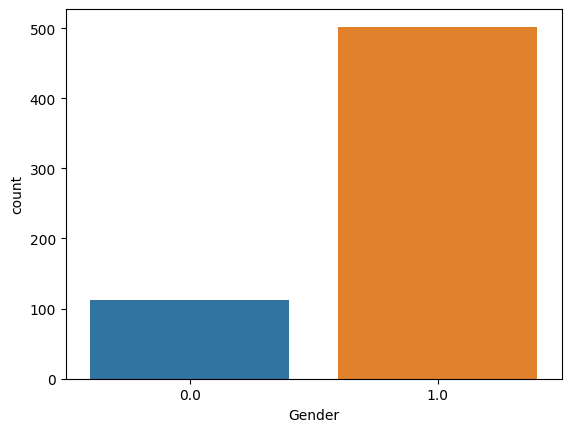

In [ ]:
# categorical attributes visualization
sns.countplot(x='Gender', data=df)


<Axes: xlabel='Married', ylabel='count'>

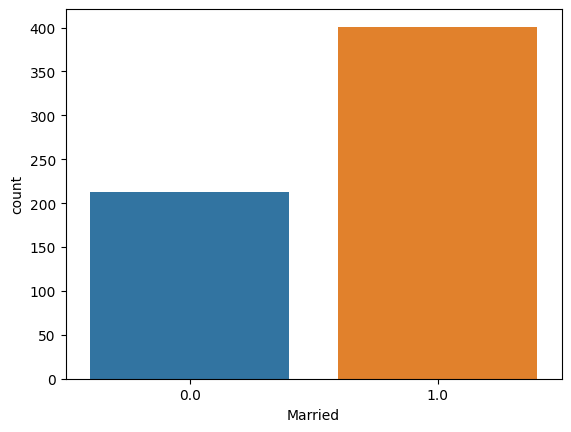

In [ ]:
sns.countplot(x='Married', data=df)

<Axes: xlabel='Dependents', ylabel='count'>

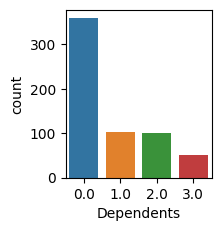

In [ ]:
plt.subplot(2, 3, 2)
sns.countplot(x='Dependents', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

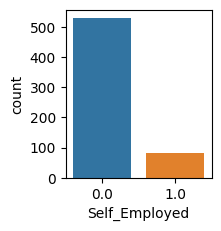

In [ ]:
plt.subplot(2, 3, 4)
sns.countplot(x='Self_Employed', data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

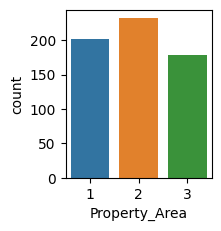

In [ ]:
plt.subplot(2, 3, 5)
sns.countplot(x='Property_Area', data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

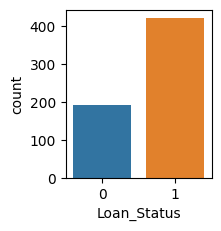

In [ ]:
plt.subplot(2, 3, 6)
sns.countplot(x='Loan_Status', data=df)

<Axes: xlabel='Applicant_Income', ylabel='Density'>

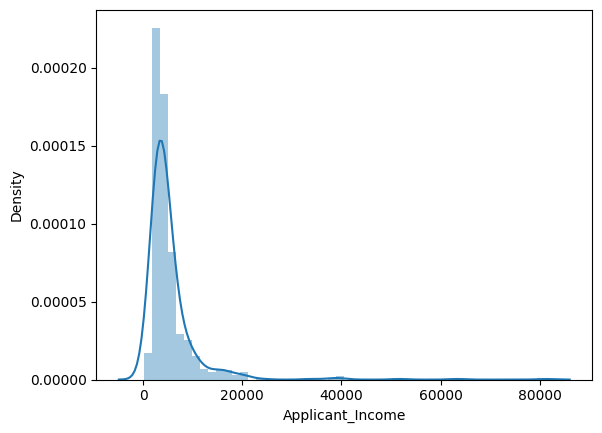

In [ ]:
# numerical attributes visualization
# plt.subplot(1, 3, 1)
sns.distplot(df["Applicant_Income"])

<Axes: xlabel='Coapplicant_Income', ylabel='Density'>

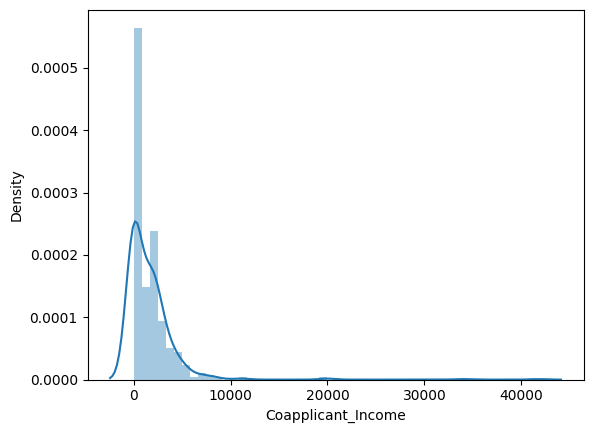

In [ ]:
sns.distplot(df["Coapplicant_Income"])

<Axes: xlabel='Loan_Amount', ylabel='Density'>

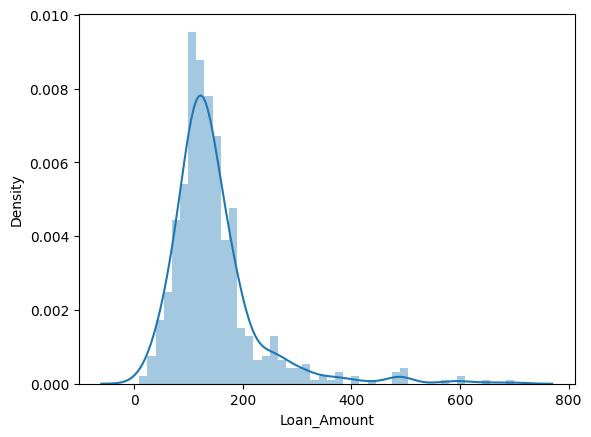

In [ ]:
sns.distplot(df["Loan_Amount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

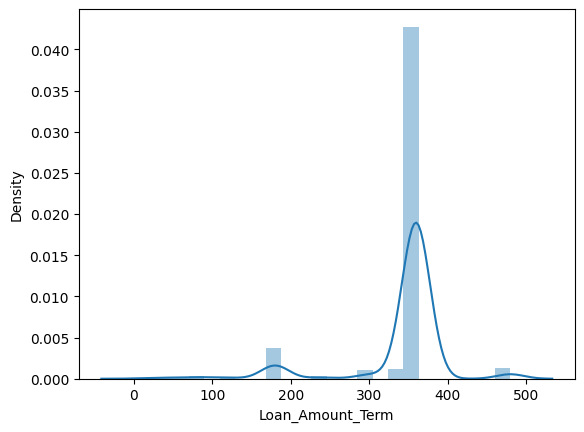

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

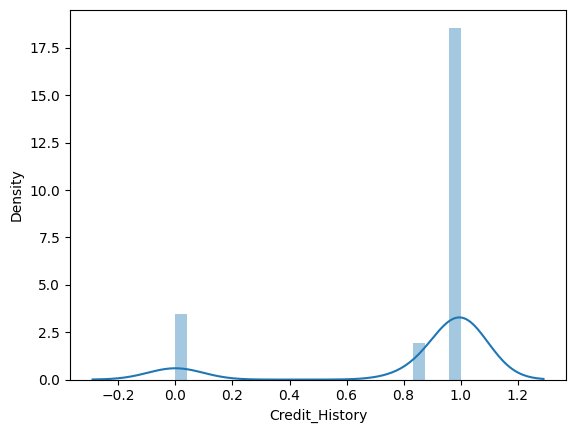

In [ ]:
sns.distplot(df['Credit_History'])

## Creation of new attributes

In [ ]:
# total income
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1002,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,1,1,5849.0
1,1003,1.0,1.0,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,3,0,6091.0
2,1005,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,1,1,3000.0
3,1006,1.0,1.0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,1,1,4941.0
4,1008,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,1,1,6000.0


## Log Transformation
Log transformation is performed to make the data more symmetric , normalize and it can be used for any statistical method , before performing of log transformation data is completely skwed distribution while it becomes normal distribution now


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

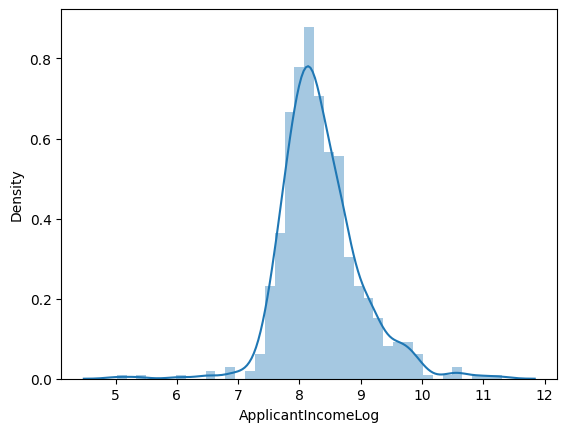

In [ ]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['Applicant_Income']+1)
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

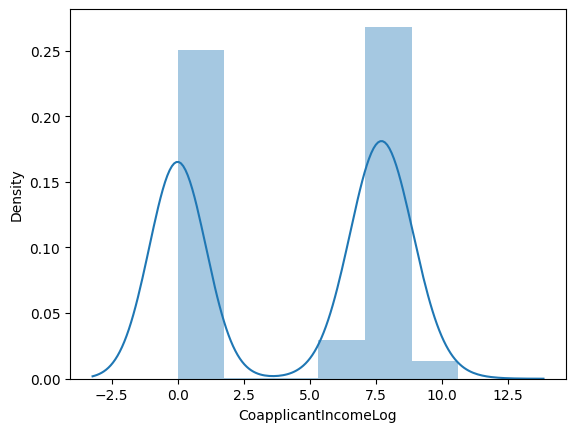

In [ ]:
df['CoapplicantIncomeLog'] = np.log(df['Coapplicant_Income']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

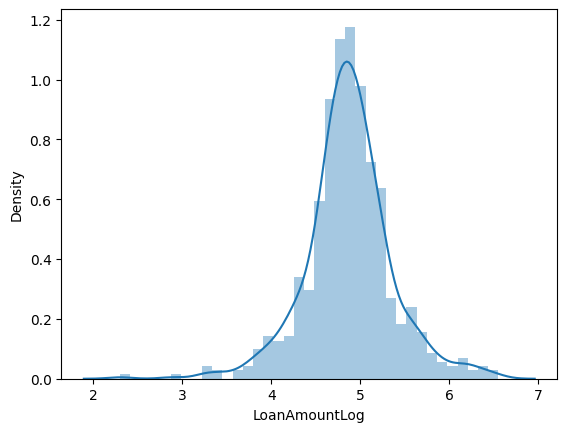

In [ ]:
df['LoanAmountLog'] = np.log(df['Loan_Amount']+1)
sns.distplot(df["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

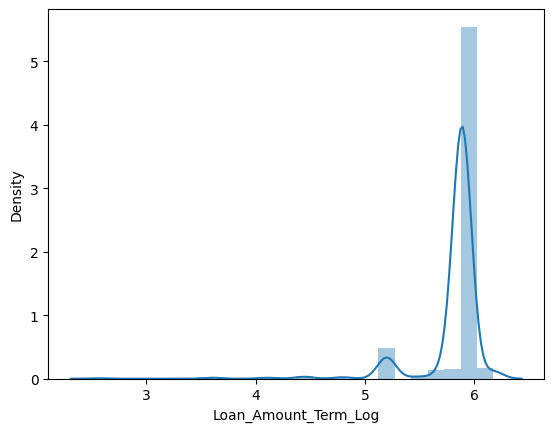

In [ ]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

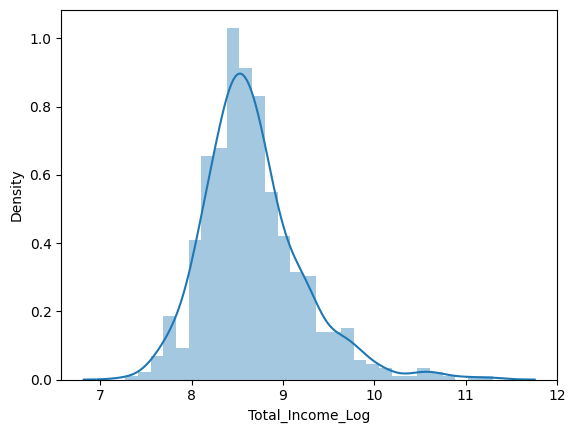

In [ ]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

# Class Imbalancing

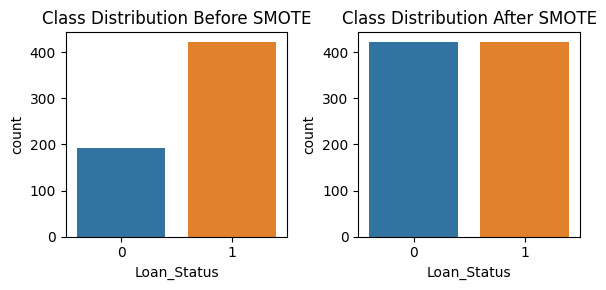

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset with 'X' as features and 'y' as the target variable
X = df.drop('Loan_ID', axis=1)
y = df['Loan_Status']

# Initialize and apply SMOTEa
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize the class distribution before and after SMOTE
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
sns.countplot(x=y, data=df)
plt.title("Class Distribution Before SMOTE")

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, data=pd.DataFrame({'target': y_resampled}))
plt.title("Class Distribution After SMOTE")

plt.tight_layout()
# plt.figure(figsize=(3, 2))  # Set the figure size to 8 inches in width and 4 inches in height
plt.show()


## Coorelation Matrix
A correlation matrix, or correlation matrix, is a table or matrix that displays the pairwise correlations between multiple variables in a dataset . It is used to identify how the column attribute is getting changes as compared to other columns .

<Axes: >

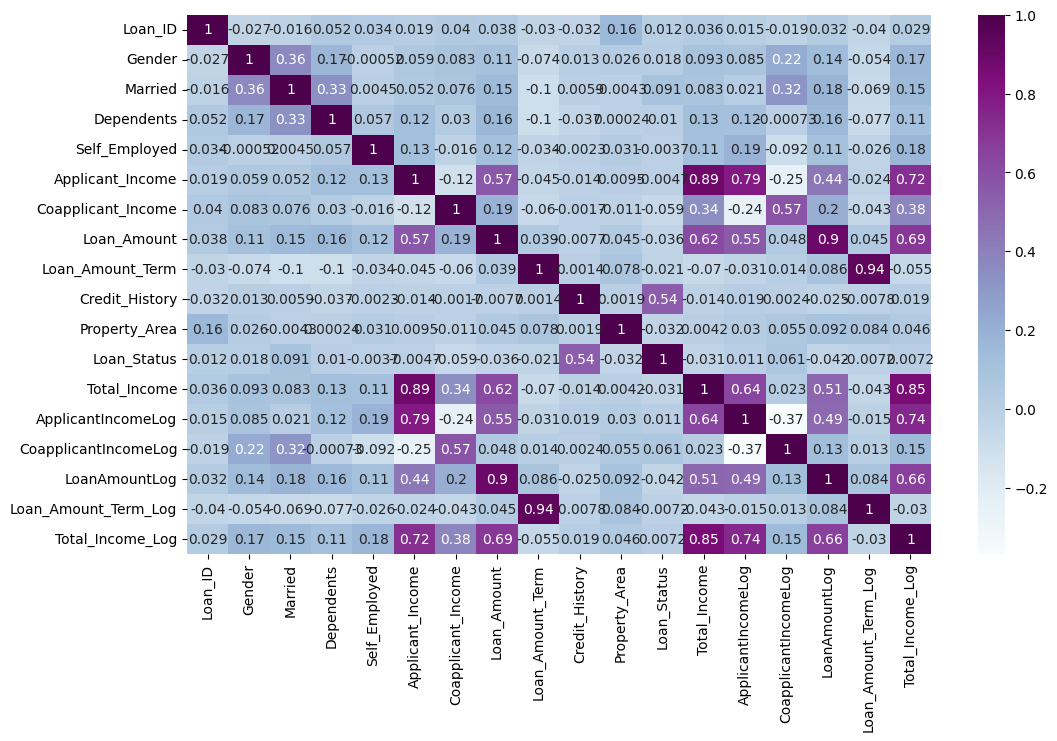

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1002,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,1,1,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,1003,1.0,1.0,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,3,0,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,1005,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,1,1,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,1006,1.0,1.0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,1,1,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,1008,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,1,1,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [ ]:
# drop unnecessary columns
cols = ['Applicant_Income', 'Coapplicant_Income', "Loan_Amount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,1.0,0,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,1.0,2,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,1,1.0,0,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,0,1.0,0,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,1.0,0,1,8.699681,4.955827,5.888878,8.699681


## Label Encoding

Label encoding is a technique used in machine learning and data preprocessing to convert categorical data (non-numeric data) into numerical format.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [157]:
df

,Gender,Married,Dependents,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,1.0,0,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,1.0,2,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,1,1.0,0,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,0,1.0,0,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,1.0,0,1,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1.0,2,1,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,1.0,2,1,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,1.0,0,1,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,1.0,0,1,8.933796,5.236442,5.888878,8.933796


## Train-Test Split

In [ ]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Training

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
tmodel = LogisticRegression()
classify(tmodel, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 70.77922077922078
Cross validation is 70.84899373583899


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 78.66719978675197


In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 75.32467532467533
Cross validation is 76.87591630014661


## Performnce Matrix


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define a function to evaluate and print classification performance metrics
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", report)

# Assuming you have already trained your models and have x_test and y_test
# For each model, you can evaluate and print the performance metrics
print("Logistic Regression:\n")
evaluate_model(tmodel, x_test, y_test)  # Logistic Regression
print("----------------------------------------------------------------------------\n")

print(" Decision Tree:\n")
evaluate_model(model, x_test, y_test)  # Decision Tree
print("----------------------------------------------------------------------------\n")

print("Random Forest:\n")
evaluate_model(model, x_test, y_test)  # Random Forest
print("----------------------------------------------------------------------------\n")

print("Extra Trees:\n")
evaluate_model(model, x_test, y_test)  # Extra Trees
print("----------------------------------------------------------------------------\n")


Logistic Regression:

Accuracy: 0.7727272727272727
Precision: 0.7480916030534351
Recall: 0.98
F1 Score: 0.8484848484848484
Confusion Matrix:
 [[21 33]
 [ 2 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

----------------------------------------------------------------------------

 Decision Tree:

Accuracy: 0.7532467532467533
Precision: 0.7627118644067796
Recall: 0.9
F1 Score: 0.8256880733944953
Confusion Matrix:
 [[26 28]
 [10 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.48      0.58        54
           1       0.76      0.90      0.83       100

    accuracy                           0.75       154
   macro avg 

In [164]:
def get_user_input():
    # Taking input for each column
    Gender = input("Enter Gender (Male:0/Female:1): ")
    Married = input("Are you Married? (Yes:1/No:0): ")
    Dependents = input("Enter number of Dependents (0/1/2/3+): ")
    Self_Employed = input("Are you Self Employed? (Yes:1/No:0): ")
    Credit_History = float(input("Enter Credit History (1 for Yes, 0 for No): "))  # Adding this line
    Property_Area = input("Enter Property Area (Urban:0/Rural:1/Semiurban:2): ")
    ApplicantIncomeLog = float(input("Enter log of Applicant Income: "))
    LoanAmountLog = float(input("Enter log of Loan Amount: "))
    Loan_Amount_Term_Log = float(input("Enter log of Loan Amount Term: "))
    Total_Income_Log = float(input("Enter log of Total Income: "))


    # Combining user inputs
    data = {
        'Gender': [Gender],
        'Married': [Married],
        'Dependents': [Dependents],
        'Self_Employed': [Self_Employed],
        'Credit_History': [Credit_History],  # Adding this line
        'Property_Area': [Property_Area],
        'ApplicantIncomeLog': [ApplicantIncomeLog],
        'LoanAmountLog': [LoanAmountLog],
        'Loan_Amount_Term_Log': [Loan_Amount_Term_Log],
        'Total_Income_Log': [Total_Income_Log]
    }

    return pd.DataFrame(data)

def preprocess_input(data):
    # Handle categorical variables with label encoding
    cols = ['Gender', "Married", 'Self_Employed', "Property_Area", "Dependents"]
    le = LabelEncoder()
    for col in cols:
        data[col] = le.fit_transform(data[col])

    return data

# Get data from the user
user_data = get_user_input()

# Preprocess the data
user_data_preprocessed = preprocess_input(user_data)

# Predict the loan status using the trained model
loan_status = tmodel.predict(user_data_preprocessed)

# Display the prediction
if loan_status[0] == 1:
    print("\n")
    print("Loan Status Approved!")
else:
    print("\n")
    print("Loan Status Denied!")

Enter Gender (Male:0/Female:1): 0
Are you Married? (Yes:1/No:0): 1
Enter number of Dependents (0/1/2/3+): 2
Are you Self Employed? (Yes:1/No:0): 1
Enter Credit History (1 for Yes, 0 for No): 0
Enter Property Area (Urban:0/Rural:1/Semiurban:2): 2
Enter log of Applicant Income: 500
Enter log of Loan Amount: 5
Enter log of Loan Amount Term: 1
Enter log of Total Income: 500


Loan Approved!
